<a href="https://colab.research.google.com/github/ichsanelf/proyek_edu_JayaMaju/blob/main/edu_institute.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Proyek Submission:**
* Nama : Ichsan Nurhendy
* Email : ichsanelf@gmail.com
* ID Dicoding : ichsanelf

# Persiapan
Menyiapkan Library yang akan digunakan

In [ ]:
!pip install scikit-optimize

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from skopt import BayesSearchCV
from imblearn.over_sampling import SMOTE
from collections import Counter
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import sklearn
import joblib
import os
import time

In [ ]:
print(f"Pandas version: {pd.__version__}")
print(f"Numpy version: {np.__version__}")
print(f"Matplotlib version: {plt.matplotlib.__version__}")
print(f"Seaborn version: {sns.__version__}")
print(f"Scikit-learn version: {sklearn.__version__}")
print(f"Joblib version: {joblib.__version__}")

Pandas version: 2.2.2
Numpy version: 1.26.4
Matplotlib version: 3.10.0
Seaborn version: 0.13.2
Scikit-learn version: 1.6.0
Joblib version: 1.4.2


In [ ]:
pd.set_option('display.max_columns', None)

Menyiapkan dataset yang akan digunakan

In [ ]:
url = "https://raw.githubusercontent.com/dicodingacademy/dicoding_dataset/refs/heads/main/students_performance/data.csv"

try:
  df = pd.read_csv(url, delimiter=';')
except Exception as e:
  print(f"An error occurred: {e}")

# Data Understanding
Tahap-tahap untuk melihat kondisi data, seperti melihat jumlah kolom dan baris, deskripsi data, dan juga data hilang atau duplikasi.

In [ ]:
df.head()

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,Mothers_occupation,Fathers_occupation,Admission_grade,Displaced,Educational_special_needs,Debtor,Tuition_fees_up_to_date,Gender,Scholarship_holder,Age_at_enrollment,International,Curricular_units_1st_sem_credited,Curricular_units_1st_sem_enrolled,Curricular_units_1st_sem_evaluations,Curricular_units_1st_sem_approved,Curricular_units_1st_sem_grade,Curricular_units_1st_sem_without_evaluations,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
0,1,17,5,171,1,1,122.0,1,19,12,5,9,127.3,1,0,0,1,1,0,20,0,0,0,0,0,0.000000,0,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,3,3,142.5,1,0,0,0,1,0,19,0,0,6,6,6,14.000000,0,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,9,9,124.8,1,0,0,0,1,0,19,0,0,6,0,0,0.000000,0,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,5,3,119.6,1,0,0,1,0,0,20,0,0,6,8,6,13.428571,0,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,9,9,141.5,0,0,0,1,0,0,45,0,0,6,9,5,12.333333,0,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


## Info

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Marital_status                                4424 non-null   int64  
 1   Application_mode                              4424 non-null   int64  
 2   Application_order                             4424 non-null   int64  
 3   Course                                        4424 non-null   int64  
 4   Daytime_evening_attendance                    4424 non-null   int64  
 5   Previous_qualification                        4424 non-null   int64  
 6   Previous_qualification_grade                  4424 non-null   float64
 7   Nacionality                                   4424 non-null   int64  
 8   Mothers_qualification                         4424 non-null   int64  
 9   Fathers_qualification                         4424 non-null   i

## Describe

In [ ]:
df.describe()

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,Mothers_occupation,Fathers_occupation,Admission_grade,Displaced,Educational_special_needs,Debtor,Tuition_fees_up_to_date,Gender,Scholarship_holder,Age_at_enrollment,International,Curricular_units_1st_sem_credited,Curricular_units_1st_sem_enrolled,Curricular_units_1st_sem_evaluations,Curricular_units_1st_sem_approved,Curricular_units_1st_sem_grade,Curricular_units_1st_sem_without_evaluations,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,18.669078,1.727848,8856.642631,0.890823,4.577758,132.613314,1.873192,19.561935,22.275316,10.960895,11.032324,126.978119,0.548373,0.011528,0.113698,0.880651,0.351718,0.248418,23.265145,0.024864,0.709991,6.270570,8.299051,4.706600,10.640822,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,0.605747,17.484682,1.313793,2063.566416,0.311897,10.216592,13.188332,6.914514,15.603186,15.343108,26.418253,25.263040,14.482001,0.497711,0.106760,0.317480,0.324235,0.477560,0.432144,7.587816,0.155729,2.360507,2.480178,4.179106,3.094238,4.843663,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,0.000000,0.000000,95.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,4.000000,4.000000,117.900000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,19.000000,0.000000,0.000000,5.000000,6.000000,3.000000,11.000000,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,5.000000,7.000000,126.100000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,20.000000,0.000000,0.000000,6.000000,8.000000,5.000000,12.285714,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,9.000000,9.000000,134.800000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,25.000000,0.000000,0.000000,7.000000,10.000000,6.000000,13.400000,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,6.000000,57.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,44.000000,194.000000,195.000000,190.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,70.000000,1.000000,20.000000,26.000000,45.000000,26.000000,18.875000,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


## Missing/Duplicate Data

In [ ]:
miss_value = df.isnull().sum()
miss_value[miss_value > 0]

,0


In [ ]:
df.duplicated().sum()

0

## Membuat sebuah Function Untuk Custom Label sumbu x dan y
Fungsi ini berguna untuk mengubah label pada sumbu x atau y tanpa perlu melakukan _encoding_ kembali menjadi data kategorikal.

In [ ]:
def get_current_label_ytick():
  current_labels = [item.get_text() for item in plt.gca().get_yticklabels()]
  current_ticks = plt.gca().get_yticks()

  return current_labels, current_ticks

def get_current_label_xtick():
  current_labels = [item.get_text() for item in plt.gca().get_xticklabels()]
  current_ticks = plt.gca().get_xticks()

  return current_labels, current_ticks

## Status Siswa
Grafik yang mengambarkan jumlah siswa berdasarkan status mereka, yaitu *Graduated*, *Dropout*, dan *Enrolled*. Dengan melihat hasil grafik bisa dilihat tingginya angka *dropout*.

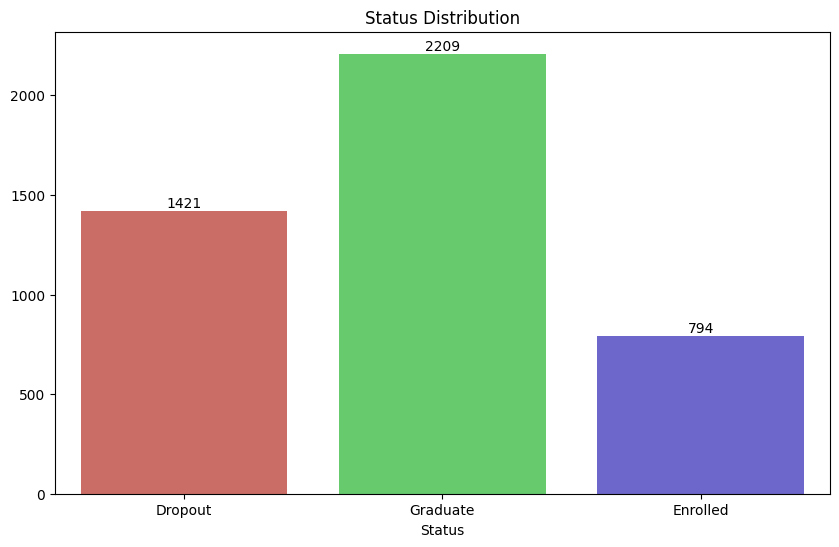

In [ ]:
plt.figure(figsize=(10,6))
ax = sns.countplot(
    data=df, x='Status',
    hue='Status', palette='hls',
    legend=False)

for p in ax.patches:
   height = p.get_height()
   if height > 0:
     ax.annotate(
         f'{int(height)}',
         (p.get_x() + p.get_width() / 2., height),
         ha='center', va='center',
         xytext=(0, 5), textcoords='offset points')

plt.xlabel('Status')
plt.ylabel('')
plt.title('Status Distribution')
plt.show()

## Umur Siswa

### Mengelompokkan Umur
Mengelompokkan siswa berdasarkan umur mereka dengan menggungkan metode _binning_.

In [ ]:
label_age = ['Young Adult', 'Adult', 'Middle Age','Senior']
bins = [16, 25, 45, 60, 100]
df['AgeGrp'] = pd.cut(df['Age_at_enrollment'], bins=bins, labels=label_age, include_lowest=True)

bin_edges = pd.cut(df['Age_at_enrollment'], bins=bins, include_lowest=True).dtype.categories
bin_ranges = dict(zip(label_age, [(bin.left, bin.right) for bin in bin_edges]))
print(bin_ranges)

{'Young Adult': (15.999, 25.0), 'Adult': (25.0, 45.0), 'Middle Age': (45.0, 60.0), 'Senior': (60.0, 100.0)}


### Distribusi Kelompuk Umur Siswa
Grafik ini menvisualisasikan kelompok umur siswa.

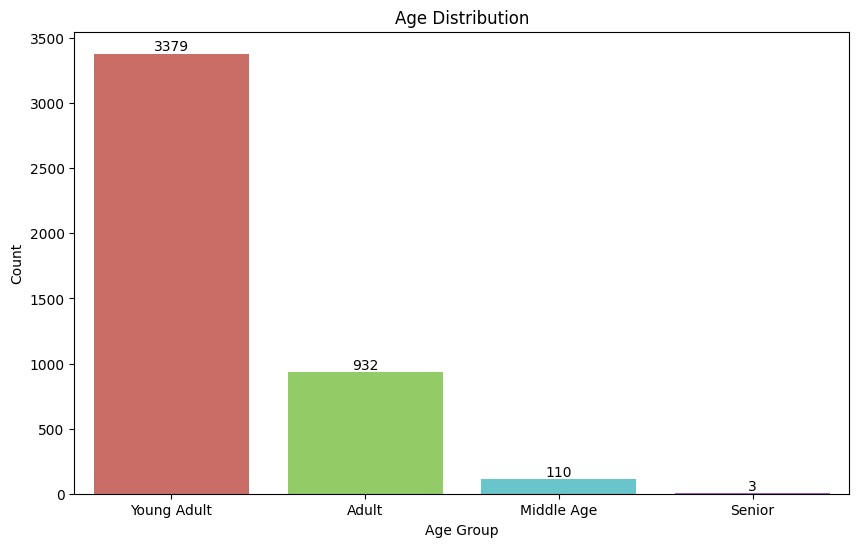

In [ ]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(
    data=df, x='AgeGrp',
    hue='AgeGrp', palette='hls',
    legend=False)

for p in ax.patches:
   height = p.get_height()
   if height > 0:
     ax.annotate(f'{int(height)}',
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center',
                xytext=(0, 5), textcoords='offset points')

plt.xlabel('Age Group')
plt.ylabel('Count')
plt.title('Age Distribution')
plt.show()

### Age by Status
Grafik ini menvisualisasikan siswa yang *Graduated*, _Dropout_, dan _Enrolled_ berdasarkan kelompok umur siswa. Dengan mengelompokkan umur siswa, kita dapat melihat pada kelompok umur mana saja yang memiliki angka *dropout* yang tinggi.

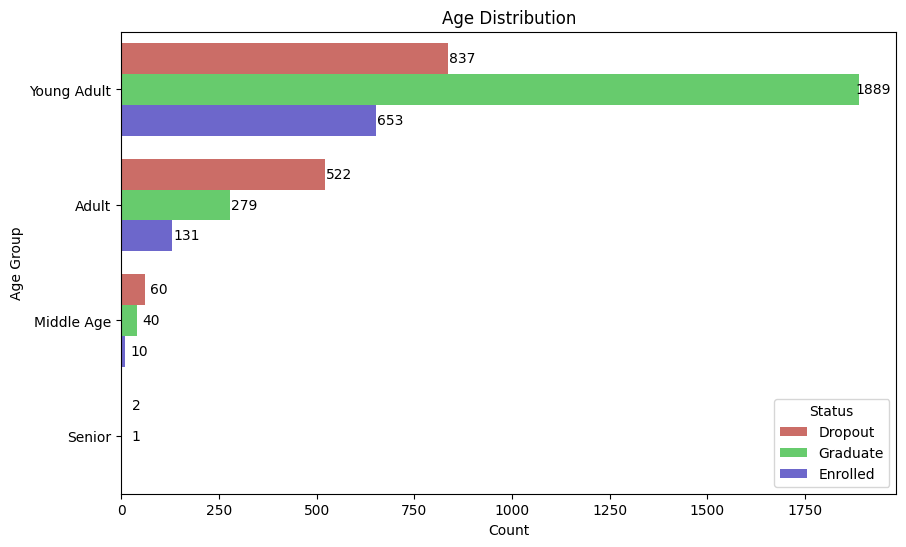

In [ ]:
age_grp = df.groupby(by=['AgeGrp','Status'], observed=False).size().reset_index(name='count')
age_grp.sort_values(by=['AgeGrp', 'count'], ascending=False, inplace=True)

plt.figure(figsize=(10, 6))
ax = sns.barplot(
    x='count', y='AgeGrp',
    data=age_grp, hue='Status',
    palette='hls'
  )

for p in ax.patches:
  width = p.get_width()
  if width > 0:
    ax.annotate(f'{int(width)}',
                (width, p.get_y() + p.get_height() / 2.),
                ha='center', va='center',
                xytext=(10, 0), textcoords='offset points')

plt.legend(title='Status', loc='lower right')
plt.xlabel('Count')
plt.ylabel('Age Group')
plt.title('Age Distribution')
plt.show()

## Jadwal Kelas Siswa(Daytime/Evening)
Menvisualisasikan distribusi siswa yang mengikuti kelas pada waktu pagi atau siang hari, dan sore atau malam hari.

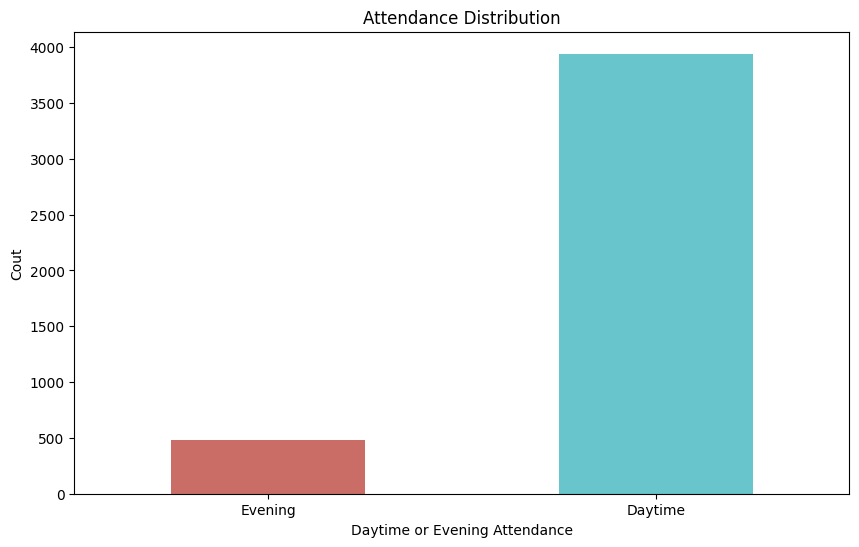

In [ ]:
plt.figure(figsize=(10, 6))

sns.countplot(
    data=df, x='Daytime_evening_attendance',
    hue='Daytime_evening_attendance', palette='hls',
    legend=False, width=0.5)

attendance_lbl = {
    0 : 'Evening',
    1 : 'Daytime',
}

attend_ticks, attend_cur_labels = get_current_label_xtick()
plt.xticks(attend_ticks, [attendance_lbl[int(label)] for label in attend_cur_labels])

plt.xlabel('Daytime or Evening Attendance')
plt.ylabel('Cout')
plt.title('Attendance Distribution')
plt.show()

### Attendance by Status
Menvisualisasikan jadwal kehadiran siswa pada kelas berdasarkan status siswa. Dari grafik ini, didapatkan hasil analisis bahwa pada waktu *daytime* terdapat banyak siswa yang *dropout*.

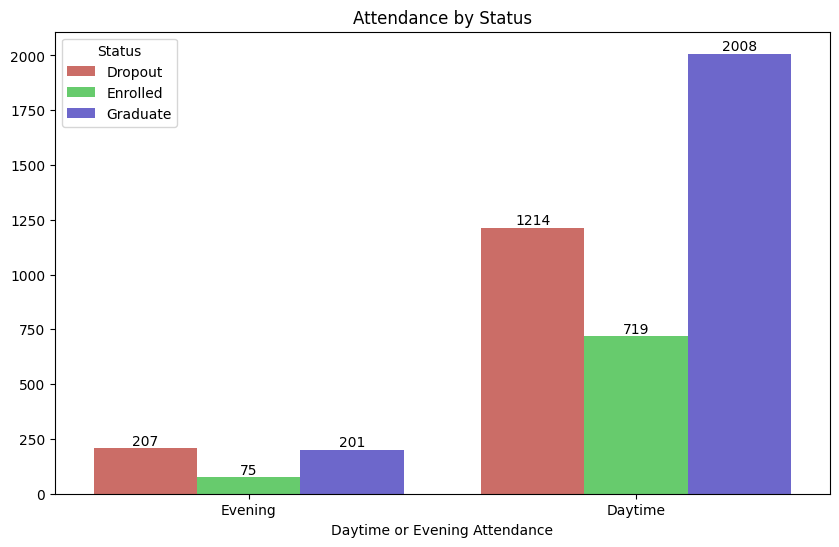

In [ ]:
df_attend = df.groupby(by=['Status', 'Daytime_evening_attendance'], observed=False).size().reset_index(name='count')

plt.figure(figsize=(10, 6))
ax = sns.barplot(
    x='Daytime_evening_attendance', y='count',
    hue='Status', palette='hls',
    data=df_attend)

for p in ax.patches:
  height = p.get_height()
  if height > 0:
     ax.annotate(f'{int(height)}',
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center',
                xytext=(0, 5), textcoords='offset points')

plt.xticks(attend_ticks, [attendance_lbl[int(label)] for label in attend_cur_labels])
plt.xlabel('Daytime or Evening Attendance')
plt.ylabel('')
plt.title('Attendance by Status')
plt.show()

## Pendidikan/Kualifikasi sebelumnya
Visualisasi pendidikan yang dimiliki oleh siswa sebelum bergabung ke dalam Institusi.

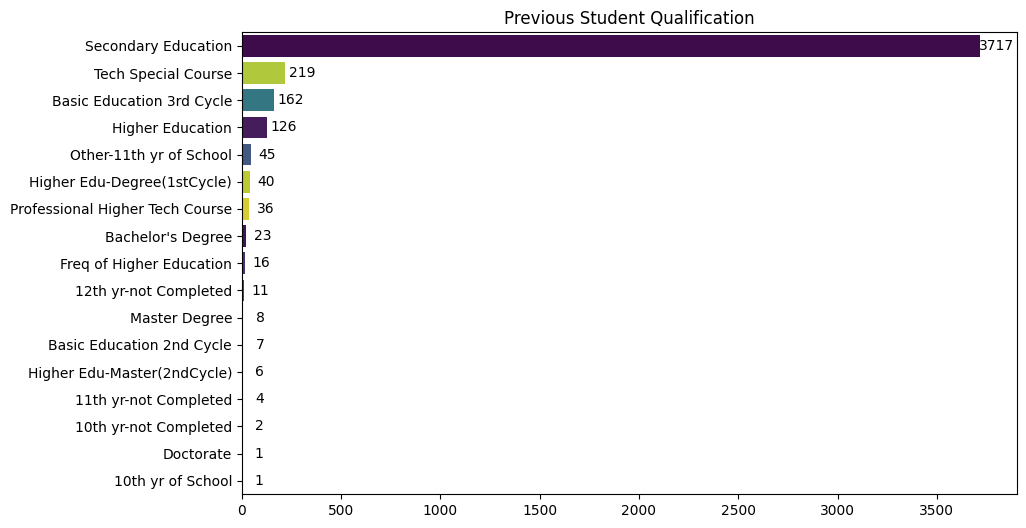

In [ ]:
pre_qua_order = df['Previous_qualification'].value_counts(ascending=False).index

plt.figure(figsize=(10, 6))
ax = sns.countplot(
    data=df, y='Previous_qualification',
    hue='Previous_qualification', palette='viridis',
    order=pre_qua_order,
    legend=False)

for p in ax.patches:
   width = p.get_width()
   if width > 0:
      ax.annotate(f'{int(width)}',
                 (width, p.get_y() + p.get_height() / 2.),
                  ha='center', va='center',
                  xytext=(12, 0), textcoords='offset points')

qualification_lbl = {
    1 : 'Secondary Education', 2 : 'Bachelor\'s Degree', 3 : 'Higher Education',
    4 : 'Master Degree', 5 : 'Doctorate', 6 : 'Freq of Higher Education', 9 : '12th yr-not Completed',
    10 : '11th yr-not Completed', 12 : 'Other-11th yr of School', 14 : '10th yr of School', 15 : '10th yr-not Completed',
    19 : 'Basic Education 3rd Cycle', 38 : 'Basic Education 2nd Cycle', 39 : 'Tech Special Course',
    40 : 'Higher Edu-Degree(1stCycle)', 42 : 'Professional Higher Tech Course', 43 : 'Higher Edu-Master(2ndCycle)'
}

qua_cur_lbl, qua_ticks = get_current_label_ytick()
plt.yticks(qua_ticks, [qualification_lbl[int(label)] for label in qua_cur_lbl])
plt.xlabel('')
plt.ylabel('')
plt.title('Previous Student Qualification')
plt.show()

## Course
Menvisualisasikan kelas-kelas yang diikuti oleh siswa dan melihat kelas apa saja yang memiliki angka dropout tertinggi(Top 5).

<Figure size 1000x800 with 0 Axes>

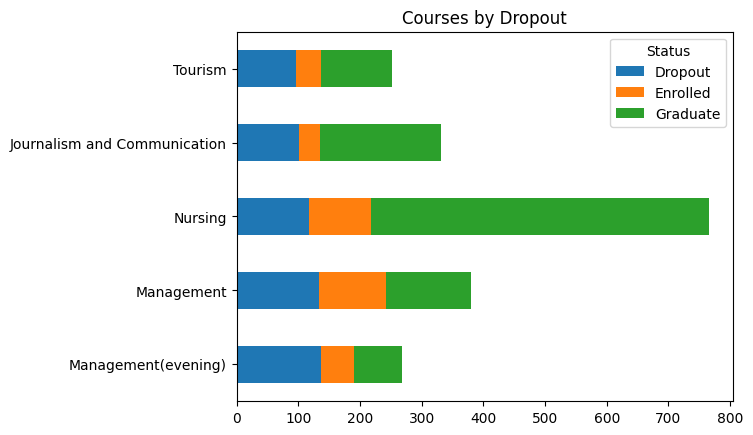

In [ ]:
course_status = df.groupby(['Course','Status'], observed=False).size().reset_index(name='count')
pivot_course = course_status.pivot(index='Course', columns='Status', values='count')
sort_course = pivot_course.sort_values(by='Dropout', ascending=False).head(5)

plt.figure(figsize=(10, 8))
sort_course.plot(kind='barh', stacked=True)

course_lbl = {33:'Biofuel Production Technologies', 171:'Animation and Multimedia Design',
              8014:'Social Service(evening)', 9003:'Agronomy',
              9070:'Communication Design', 9085:'Veterinary Nursing',
              9119:'Informatics Engineering', 9130:'Equinculture',
              9147:'Management', 9238:'Social Service', 9254:'Tourism',
              9500:'Nursing', 9556:'Oral Hygiene', 9670:'Advertising and Marketing Management',
              9773:'Journalism and Communication', 9853:'Basic Education', 9991:'Management(evening)'}

course_cur_lbl, course_tick = get_current_label_ytick()

plt.yticks(course_tick, [course_lbl[int(label)] for label in course_cur_lbl])
plt.title('Courses by Dropout')
plt.xlabel('')
plt.ylabel('')
plt.show()

## Gender
Membuat grafik distribusi jenis kelamin siswa.

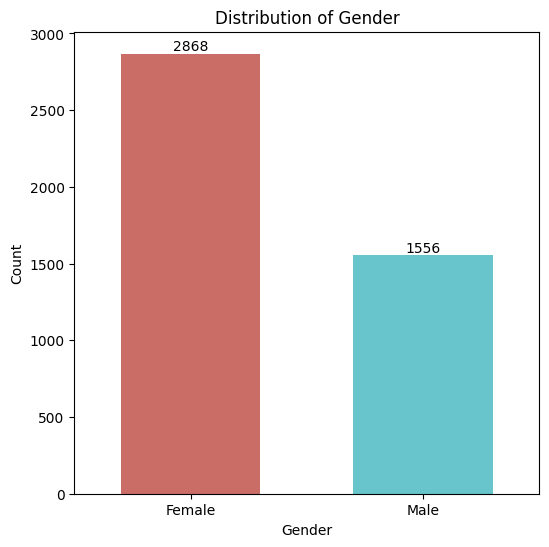

In [ ]:
plt.figure(figsize=(6, 6))
ax = sns.countplot(
              x='Gender', data=df,
              hue='Gender', palette='hls',
              width=0.6, legend=False)

for p in ax.patches:
   height = p.get_height()
   if height > 0:
      ax.annotate(f'{int(height)}',
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center',
                xytext=(0,5), textcoords='offset points'
                )

gender_lbl = {0:'Female', 1:'Male'}

gender_ticks, gender_cur_lbl = get_current_label_xtick()
plt.xticks(gender_ticks, [gender_lbl[int(label)] for label in gender_cur_lbl])

plt.title('Distribution of Gender')
plt.xlabel('Gender')
plt.ylabel('Count')

plt.show()

### Gender by Age
Visualisasi umur siswa berdasarkan gender.

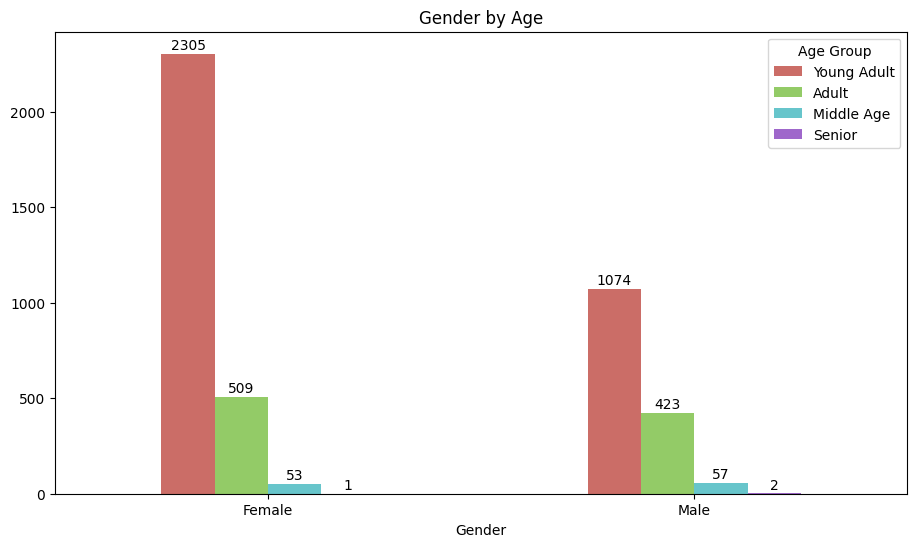

In [ ]:
att_by_gender = df.groupby(by=['AgeGrp', 'Gender'], observed=False).size().reset_index(name='count')

plt.figure(figsize=(11, 6))
ax = sns.barplot(
                x='Gender', y='count',
                hue='AgeGrp', palette='hls',
                data=att_by_gender, width=0.5
                )

for p in ax.patches:
  height = p.get_height()
  if height > 0:
     ax.annotate(f'{int(height)}',
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center',
                xytext=(0,6), textcoords='offset points')

plt.xticks(gender_ticks, [gender_lbl[int(label)] for label in gender_cur_lbl])
plt.title('Gender by Age')
plt.xlabel('Gender')
plt.ylabel('')
plt.legend(title='Age Group')
plt.xticks(rotation=0)
plt.show()

### Gender by Status
Visualisasi siswa yang sudah lulus/dropout berdasarkan gender.

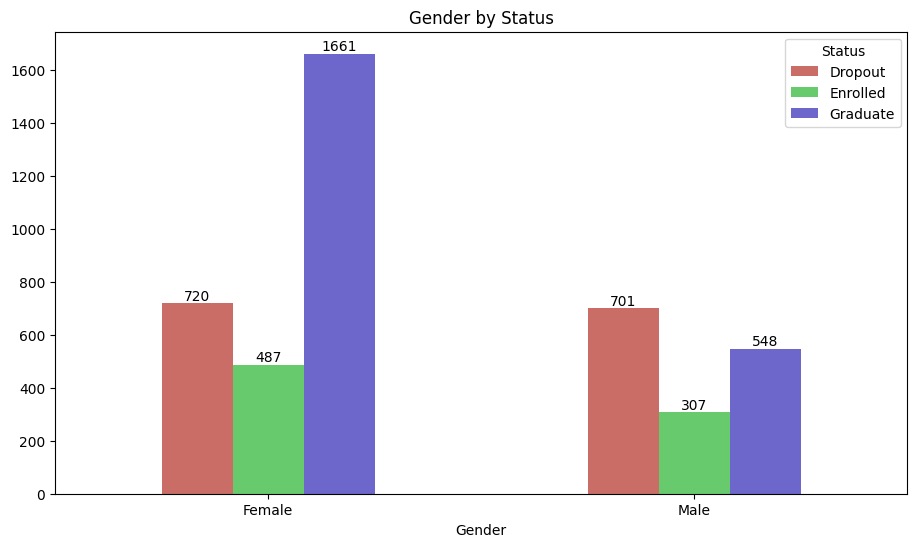

In [ ]:
att_by_gender = df.groupby(by=['Status', 'Gender'], observed=False).size().reset_index(name='count')

plt.figure(figsize=(11, 6))
ax = sns.barplot(
                x='Gender', y='count',
                hue='Status', palette='hls',
                data=att_by_gender, width=0.5
                )

for p in ax.patches:
  height = p.get_height()
  if height > 0:
     ax.annotate(f'{int(height)}',
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center',
                xytext=(0,5), textcoords='offset points')

plt.xticks(gender_ticks, [gender_lbl[int(label)] for label in gender_cur_lbl])

plt.title('Gender by Status')
plt.xlabel('Gender')
plt.ylabel('')
plt.xticks(rotation=0)
plt.show()

## Status Menikah
Visualisasi status menikah siswa(single/married/etc)

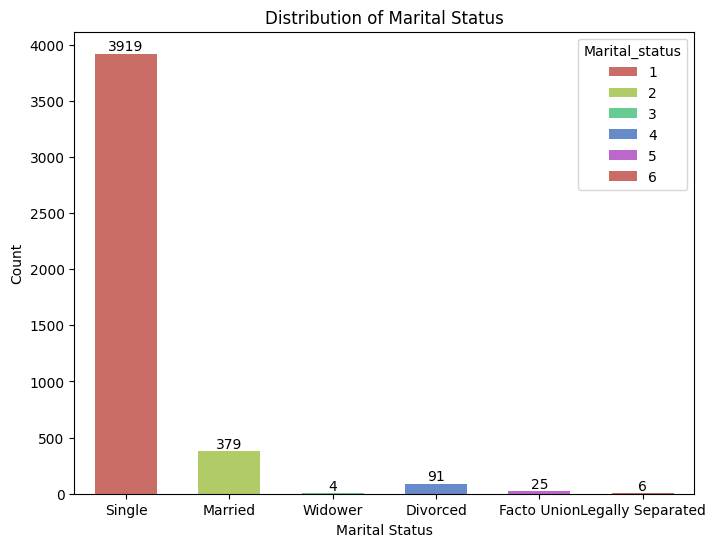

In [ ]:
plt.figure(figsize=(8, 6))

ax = sns.countplot(x='Marital_status',
              data=df,
              hue='Marital_status',
              palette='hls',
              width=0.6)

marital_lbl = {
    1:'Single', 2:'Married', 3:'Widower',
    4:'Divorced', 5:'Facto Union', 6:'Legally Separated'
}

marital_cur_lbl, marital_tick = get_current_label_xtick()
plt.xticks(marital_tick, [marital_lbl[int(label)] for label in marital_cur_lbl])

for p in ax.patches:
    height = p.get_height()
    if height > 0:
      ax.annotate(f'{int(height)}',
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center',
                xytext=(0, 5), textcoords='offset points')

plt.title('Distribution of Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.show()

## Education Special Need
Menvisualisasikan siswa yang membutuhkan kebutuhan khusus.

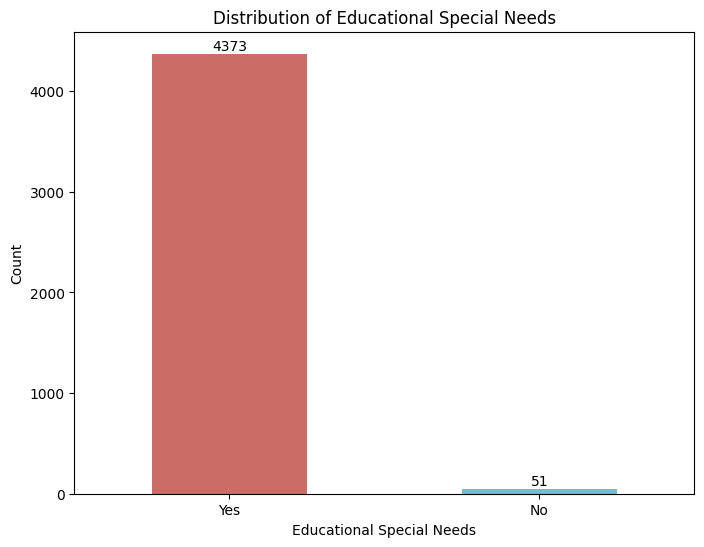

In [ ]:
plt.figure(figsize=(8,6))

ax = sns.countplot(x='Educational_special_needs',
              data=df,
              hue='Educational_special_needs',
              palette='hls',
              width=0.5, legend=False)

for p in ax.patches:
    height = p.get_height()
    if height > 0:
      ax.annotate(f'{int(height)}',
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center',
                xytext=(0, 5), textcoords='offset points')

special_need_lbl = {1:'Yes', 0:'No'}
special_tick, special_cur_lbl = get_current_label_xtick()
plt.xticks(special_tick, [special_need_lbl[int(label)] for label in special_need_lbl])

plt.title('Distribution of Educational Special Needs')
plt.xlabel('Educational Special Needs')
plt.ylabel('Count')
plt.show()

## Scholarship Holder
Menvisualisasikan distribusi siswa yang memiliki beasiswa.

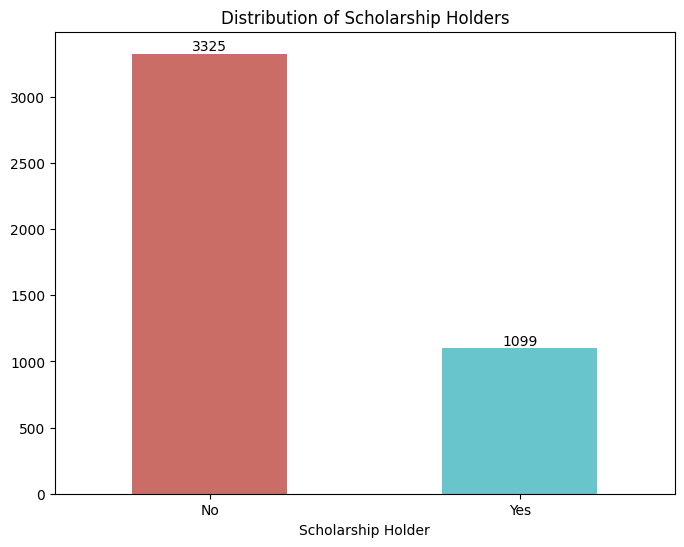

In [ ]:
plt.figure(figsize=(8, 6))

ax = sns.countplot(x='Scholarship_holder',
              data=df,
              hue='Scholarship_holder',
              palette='hls',
              width=0.5, legend=False)

for p in ax.patches:
    height = p.get_height()
    if height > 0:
       ax.annotate(f'{int(height)}',
                  (p.get_x() + p.get_width() / 2., height),
                   ha='center', va='center',
                   xytext=(0,5), textcoords='offset points')

scholar_lbl = {1:'Yes', 0:'No'}
sch_tick, sch_cur_labels = get_current_label_xtick()
plt.xticks(sch_tick, [scholar_lbl[int(label)] for label in sch_cur_labels])

plt.title('Distribution of Scholarship Holders')
plt.xlabel('Scholarship Holder')
plt.ylabel('')
plt.show()

### Scholarship by Status
Visualisasi siswa yang memiliki beasiswa berdasarkan status siswa.

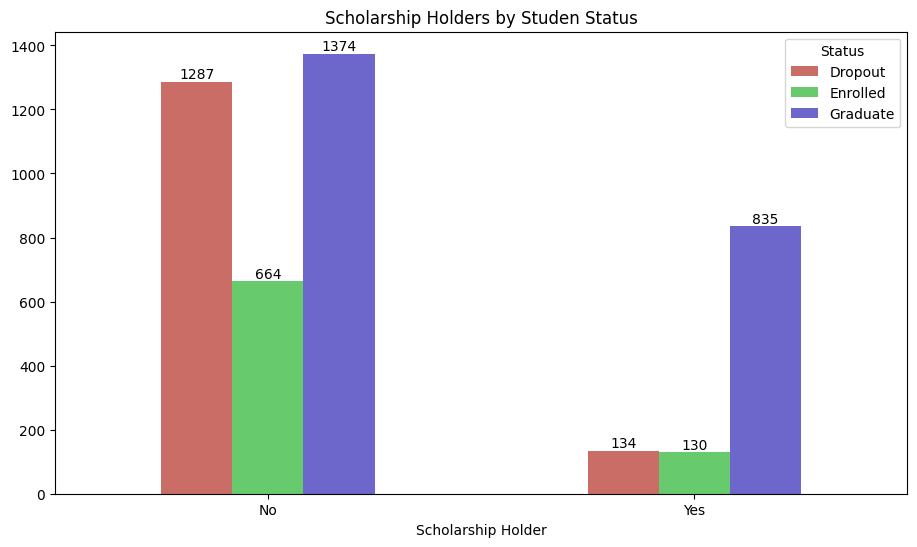

In [ ]:
sch_by_status = df.groupby(by=['Status', 'Scholarship_holder'], observed=False).size().reset_index(name='count')

plt.figure(figsize=(11, 6))
ax = sns.barplot(
                x='Scholarship_holder', y='count',
                hue='Status', palette='hls',
                data=sch_by_status, width=0.5)

for p in ax.patches:
  height = p.get_height()
  if height > 0:
    ax.annotate(f'{int(height)}',
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center',
                xytext=(0,5), textcoords='offset points')


plt.xticks(sch_tick, [scholar_lbl[int(label)] for label in sch_cur_labels])

plt.title('Scholarship Holders by Studen Status')
plt.xlabel('Scholarship Holder')
plt.ylabel('')
plt.show()

## Debtor
Menvisualisasikan siswa yang memiliki hutang atau tidak.

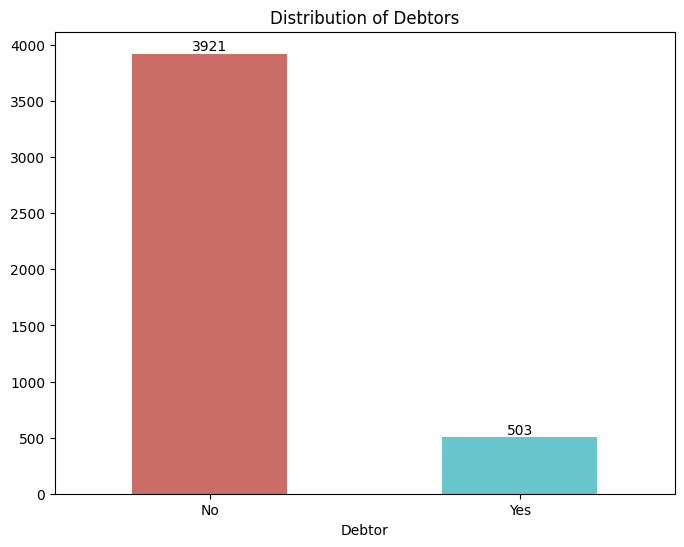

In [ ]:
plt.figure(figsize=(8, 6))

ax = sns.countplot(x='Debtor',
              data=df,
              hue='Debtor',
              palette='hls',
              width=0.5, legend=False)

for p in ax.patches:
    height = p.get_height()
    if height > 0:
      ax.annotate(f'{int(height)}',
                 (p.get_x() + p.get_width() / 2., height),
                  ha='center', va='center',
                  xytext=(0,5), textcoords='offset points')

debtor_lbl = {1:'Yes', 0:'No'}
debt_tick, debt_cur_labels = get_current_label_xtick()
plt.xticks(debt_tick, [debtor_lbl[int(label)] for label in debt_cur_labels])

plt.title('Distribution of Debtors')
plt.xlabel('Debtor')
plt.ylabel('')
plt.show()

### Debtor by Status
Visualisasi siswa yang berhutang atau tidak berdasarkan status.


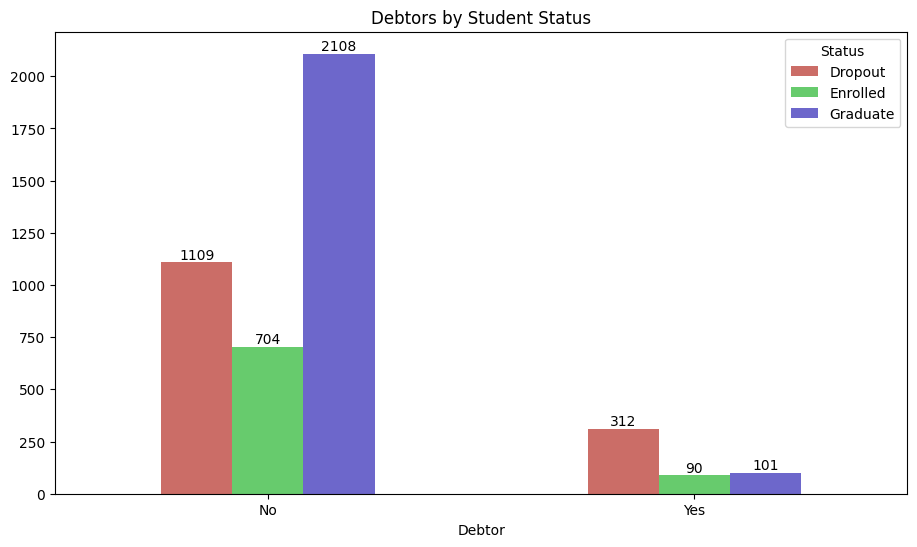

In [ ]:
debt_status = df.groupby(by=['Status', 'Debtor'], observed=False).size().reset_index(name='count')

plt.figure(figsize=(11, 6))
ax = sns.barplot(
                x='Debtor', y='count',
                hue='Status', palette='hls',
                data=debt_status, width=0.5)

for p in ax.patches:
  height = p.get_height()
  if height > 0:
    ax.annotate(f'{int(height)}',
               (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center',
                xytext=(0,5), textcoords='offset points')

plt.xticks(debt_tick, [debtor_lbl[int(label)] for label in debt_cur_labels])

plt.title('Debtors by Student Status')
plt.xlabel('Debtor')
plt.ylabel('')
plt.show()

## Tuition Fees Up to Date
Visualisasi distribusi siswa yang membayaran iuran secara tepat waktu atau tidak.


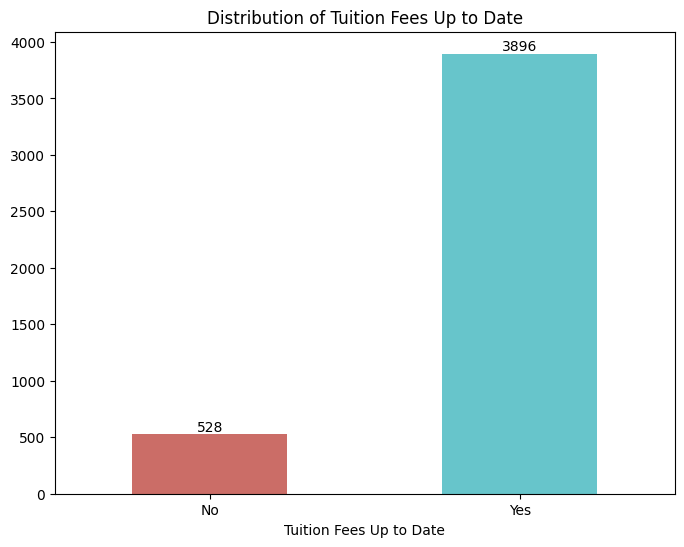

In [ ]:
plt.figure(figsize=(8, 6))

ax = sns.countplot(x='Tuition_fees_up_to_date',
              data=df,
              hue='Tuition_fees_up_to_date',
              palette='hls',
              width=0.5, legend=False)

for p in ax.patches:
    height = p.get_height()
    if height > 0:
      ax.annotate(f'{int(height)}',
                 (p.get_x() + p.get_width() / 2., height),
                  ha='center', va='center',
                  xytext=(0,5), textcoords='offset points')

tuition_lbl = {1:'Yes', 0:'No'}
tuition_tick, tuition_cur_lbl = get_current_label_xtick()
plt.xticks(tuition_tick,[tuition_lbl[int(label)]for label in tuition_cur_lbl])
plt.title('Distribution of Tuition Fees Up to Date')
plt.xlabel('Tuition Fees Up to Date')
plt.ylabel('')
plt.show()

### Tuition by Status
Visualisasi siswa-siswa yang membayar secara tepat waktu atau tidak berdasarkan status.

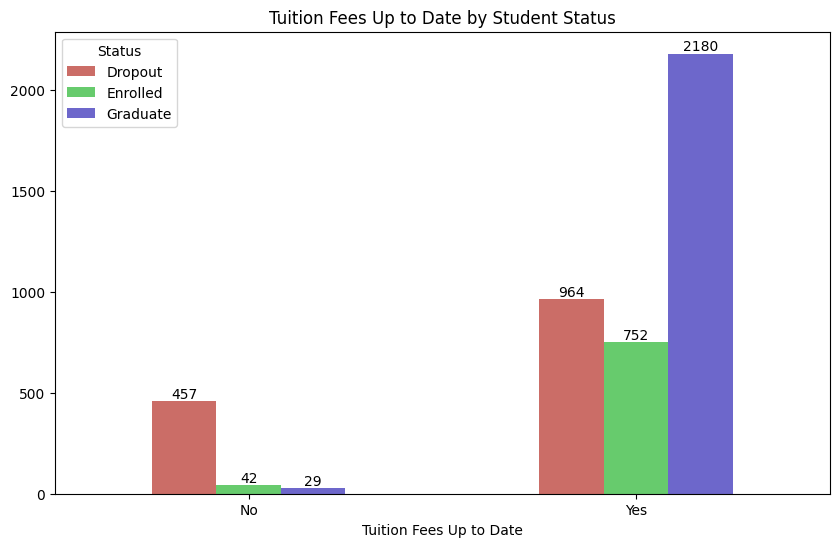

In [ ]:
tuition_by_status = df.groupby(['Tuition_fees_up_to_date', 'Status'], observed=False).size().reset_index(name='count')
plt.figure(figsize=(10, 6))

ax = sns.barplot(
                x='Tuition_fees_up_to_date', y='count',
                hue='Status', palette='hls',
                data=tuition_by_status, width=0.5)
for p in ax.patches:
  height = p.get_height()
  if height > 0:
    ax.annotate(f'{int(height)}',
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center',
                xytext=(0,5), textcoords='offset points')

plt.xticks(tuition_tick,[tuition_lbl[int(label)]for label in tuition_cur_lbl])
plt.title('Tuition Fees Up to Date by Student Status')
plt.xlabel('Tuition Fees Up to Date')
plt.ylabel('')
plt.show()

# Data Preparation / Preprocessing

menyiapkan scaler dengan menggunakan **MinMaxScaler()**

In [ ]:
scaler = MinMaxScaler()

## Feature Selection
Melakukan *featuring selection* untuk mencari feature terbaik atau penting.

In [ ]:
def select_important_features(x, y, n_estimators=100, threshold=0.05):
    rf_model = RandomForestClassifier(n_estimators=n_estimators, random_state=42)
    rf_model.fit(x, y)

    importances = rf_model.feature_importances_
    indices = np.argsort(importances)[::-1]
    important_features_indices = [i for i in range(len(importances)) if importances[i] >= threshold]

    print("Selected features (above the threshold):")
    for i in important_features_indices:
        print(f"{x.columns[i]}: {importances[i]}")

    important_features = x.columns[important_features_indices]
    x_important = x[important_features]

    return x_important

x_selected = df.drop(['Status', 'AgeGrp'], axis=1)
y = df['Status']

x_important = select_important_features(x_selected, y)

Selected features (above the threshold):
Curricular_units_1st_sem_approved: 0.09068211316207295
Curricular_units_1st_sem_grade: 0.06004978690297699
Curricular_units_2nd_sem_approved: 0.13974125351243682
Curricular_units_2nd_sem_grade: 0.11282934485100078


## Data Splitting, Oversampling dan Scaling
Membagi data untuk pelatihan alkdjasd. Kemudian feature pada variable X akan di-scaling dengan menggunakan MinMaxScaller(). Setelah itu data akan diseimbangkan menggunakan SMOTE.

In [ ]:
X = df[["Debtor", "Tuition_fees_up_to_date",
        "Daytime_evening_attendance", "Age_at_enrollment"
    ] + list(x_important.columns)]

x_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.1, random_state=42)

print(Counter(y_train))

smote = SMOTE(sampling_strategy='all', random_state=42, k_neighbors=50)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print(Counter(y_train_resampled))

Counter({'Graduate': 1996, 'Dropout': 1274, 'Enrolled': 711})
Counter({'Dropout': 1996, 'Graduate': 1996, 'Enrolled': 1996})


# Model
Membangung model **Random Forest** dengan menggunakan paramater** random_state=42** **dan class_weight='balanced'**.

In [ ]:
rf = RandomForestClassifier(random_state=42, class_weight='balanced').fit(X_train_resampled, y_train_resampled)


# Evaluasi
Mengevaluasi model dengan menggunakan metrik *accuracy*, *precision*, *recall*, dan *f1-score*. Kemudian membuat sebuah *heatmap* untuk melihat hasil klasifikasi. Hasil evaluasi ini menunjukkan model memiliki performa yang sangat baik pada data latih. Namun, untuk pada data uji model memiliki yang cukup baik. Dengan melihat metric _precision_, _recall_, dan _f1-score_, model masih belum dapat mengenal kelas *Enrolled*, dibandingkan dengan kelas lainnya. Untuk itu akan dilakukan _hyperparameter tuning_.

Accuracy(Train): 0.9757849031396125
Accuracy(Test): 0.7246049661399548
Classification Report:
               precision    recall  f1-score   support

     Dropout       0.77      0.76      0.76       147
    Enrolled       0.49      0.40      0.44        83
    Graduate       0.77      0.83      0.80       213

    accuracy                           0.72       443
   macro avg       0.67      0.66      0.67       443
weighted avg       0.72      0.72      0.72       443



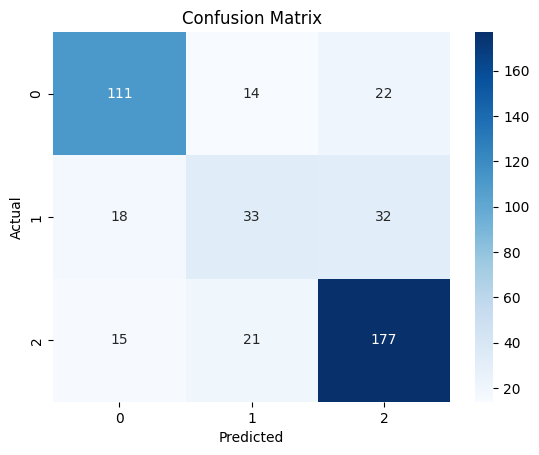

In [ ]:
y_pred = rf.predict(X_test)
y_train_pred = rf.predict(X_train_resampled)

print("Accuracy(Train):", accuracy_score(y_train_resampled, y_train_pred))
print("Accuracy(Test):", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

rf_cm = confusion_matrix(y_test, y_pred)

sns.heatmap(rf_cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Hyperparameter Tuning

Melakukan hyperparameter tuning dengan menggunakan ByesSearchCV untuk mendapatkan parameter terbaik.

In [ ]:
start_time = time.time()

param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10, 15, 20, 25],
    'min_samples_leaf': [1, 2, 4, 6, 10, 15],
    'bootstrap': [True, False],
    'max_features': [None, 'sqrt', 'log2'],
    'class_weight': ['balanced', None],
    'random_state': [None, 5, 42]
}

bayes_search = BayesSearchCV(estimator=rf, search_spaces=param_grid, n_iter=56, cv=10, n_jobs=-1, verbose=5, random_state=42)

bayes_search.fit(X_train_resampled, y_train_resampled)
endtim = time.time()

best_param = bayes_search.best_params_
print("Best parameters found: ", best_param)
print("Time taken: ", (endtim - start_time/60), "minute")

Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for eac

# Re-evaluasi
Melakukan evaluasi kembali dengan menggunakan parameter yang didapatkan dari Hyperparameter tuning.

Accuracy(Train): 0.9515698062792252
Accuracy(Test): 0.7358916478555305
Classification Report(Test):
               precision    recall  f1-score   support

     Dropout       0.79      0.73      0.76       147
    Enrolled       0.49      0.42      0.45        83
    Graduate       0.78      0.86      0.82       213

    accuracy                           0.74       443
   macro avg       0.69      0.67      0.68       443
weighted avg       0.73      0.74      0.73       443



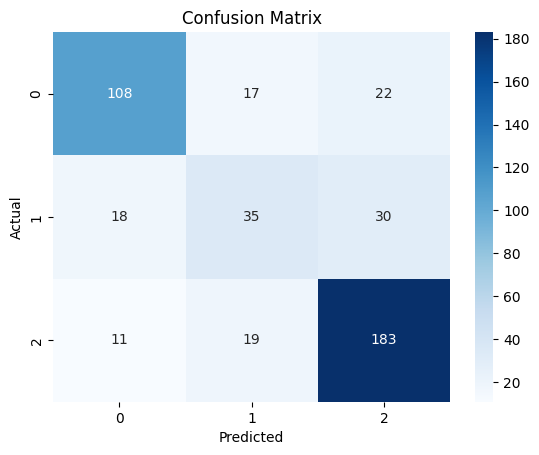

In [ ]:
best_rf = RandomForestClassifier(**best_param)

# Train the model with the best parameters
best_rf.fit(X_train_resampled, y_train_resampled)

# Predict and evaluate
y_pred = best_rf.predict(X_test)
y_train_pred = best_rf.predict(X_train_resampled)
print("Accuracy(Train):", accuracy_score(y_train_resampled, y_train_pred))
print("Accuracy(Test):", accuracy_score(y_test, y_pred))
print("Classification Report(Test):\n", classification_report(y_test, y_pred))

rf_cm = confusion_matrix(y_test, y_pred)

sns.heatmap(rf_cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Walau sudah melakukan **Hyperparameter tuning** untuk mencari parameter terbaik. Hasil evaluasi tidak menunjukkan peningkatan yang signifikan.

# Export
Export model dengan menggunakan joblib untuk di-deploy dengan Streamlit.

In [ ]:
model_dir = "model"
if not os.path.exists(model_dir):
    os.makedirs(model_dir)

joblib.dump(best_rf, "model/RandomForest_model.joblib")
joblib.dump(scaler, "model/scaler.joblib")

['model/scaler.joblib']

Membuat text requirements.txt

In [ ]:
#!pip freeze > requirements.txt

Menghapus library yang tidak dibutuhkan pada requirements.txt

In [ ]:
# Read the file and filter the lines
with open('requirements.txt', 'r') as f:
    lines = f.readlines()

# Define the packages you want to keep
required_packages = ['pandas', 'matplotlib', 'seaborn', 'gdown',
                     'joblib', 'numpy', 'sklearn', 'os',
                     'time', 'skopt', 'imblearn', 'streamlit' ]

# Filter the lines
filtered_lines = [line for line in lines if any(package in line for package in required_packages)]

# Write the filtered lines to a new requirements file
with open('requirements.txt', 'w') as f:
    f.writelines(filtered_lines)

# Display the contents of the new requirements file
!cat requirements.txt

aiosignal==1.3.2
async-timeout==4.0.3
blosc2==2.7.1
en-core-web-sm @ https://github.com/explosion/spacy-models/releases/download/en_core_web_sm-3.7.1/en_core_web_sm-3.7.1-py3-none-any.whl#sha256=86cc141f63942d4b2c5fcee06630fd6f904788d2f0ab005cce45aadb8fb73889
gdown==5.2.0
geopandas==1.0.1
googleapis-common-protos==1.66.0
ipyfilechooser==0.6.0
joblib==1.4.2
librosa==0.10.2.post1
matplotlib==3.10.0
matplotlib-inline==0.1.7
matplotlib-venn==1.1.1
numpy==1.26.4
nvidia-cuda-runtime-cu12==12.6.77
osqp==0.6.7.post3
pandas==2.2.2
pandas-datareader==0.10.0
pandas-gbq==0.26.1
pandas-stubs==2.2.2.240909
qdldl==0.1.7.post5
scs==3.2.7.post2
seaborn==0.13.2
sklearn-compat==0.1.3
sklearn-pandas==2.2.0
soxr==0.5.0.post1
streamlit==1.41.1
xgboost==2.1.3
